In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [103]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
df.shape

(5110, 12)

In [106]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [107]:
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]

In [108]:
X.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [109]:
y.mean()

stroke    0.048728
dtype: float64

In [110]:
#dropping id columns
X_wo_ids = X.drop(['id'],axis=1)
X_wo_ids.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [111]:
#check null values  
X_wo_ids.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
dtype: float64

## Encode numerical feature

In [112]:
num = X_wo_ids.select_dtypes(include='number')
num.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [113]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)
num_1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0.0,1.0,228.69,36.600000
1,61.0,0.0,0.0,202.21,28.893237
2,80.0,0.0,1.0,105.92,32.500000
3,49.0,0.0,0.0,171.23,34.400000
4,79.0,1.0,0.0,174.12,24.000000


In [114]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [115]:
num_1=num_1.apply(lambda x: outlier_capping(x))
num_1.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.90,0.99])

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.231429,0.097456,0.054012,106.047192,28.842239
std,22.603599,0.296607,0.226063,44.940759,7.405801
min,1.080000,0.000000,0.000000,56.330900,15.109000
1%,1.080000,0.000000,0.000000,56.331719,15.117190
5%,5.000000,0.000000,0.000000,60.713500,17.700000
25%,25.000000,0.000000,0.000000,77.245000,23.800000
50%,45.000000,0.000000,0.000000,91.885000,28.400000
75%,61.000000,0.000000,0.000000,114.090000,32.800000
90%,75.000000,0.000000,0.000000,192.181000,38.700000


## Encode categorical feature

In [116]:
char = X_wo_ids.select_dtypes(include='object')
char.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [117]:
char_encode = pd.get_dummies(char,drop_first=True)
char_encode.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0


## Feature Discretization

In [118]:
#from sklearn.preprocessing import KBinsDiscretizer
#Bins=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='quantile')
#X_binned=pd.DataFrame(Bins.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Bin')
#X_binned.describe()

In [119]:
#X_binned=pd.concat([X_binned,y],axis=1,join="inner")

In [120]:
#import matplotlib.pyplot as plt
#from numpy import mean
#for col in (X_binned.columns):
#    plt.figure()
#    ax=sns.lineplot(x=col,y='stroke',data=X_binned,estimator=mean)
#    plt.show()

In [129]:
num_2 = num_1.drop(['hypertension','heart_disease'],axis=1)
num_2.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000


In [121]:
#char_feature_check=pd.concat([char,y],axis=1,join="inner")

In [122]:
#import matplotlib.pyplot as plt
#from numpy import mean
#for col in (char_feature_check.columns):
#    plt.figure()
#    ax=sns.barplot(x=col,y='stroke',data=char_feature_check,estimator=mean)
#    plt.show()

## Final DataSet For ModelBuilding

In [194]:
X_all = pd.concat([num_2,char_encode],axis=1,join='inner')
X_all.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.000000,0,0,1,0,0,1,0,0,0,1,0


## Feature Scaling

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X_all),index=X_all.index, columns=X_all.columns).add_suffix('_std')

In [186]:
X_std.shape

(5110, 14)

In [199]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_all,y, test_size=0.3,random_state=40)

In [200]:
y_train.mean()

stroke    0.049762
dtype: float64

In [201]:
y_test.mean()

stroke    0.046314
dtype: float64

In [202]:
X_test.shape

(1533, 14)

In [203]:
X_train.shape

(3577, 14)

## KNN Implementation

In [161]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors = 3, weights='distance',metric = 'minkowski', p = 2)
clf.fit(X_train,y_train)

<ipython-input-161-7fa147c6e60f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [162]:
y_pred=clf.predict(X_test)

In [163]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9393346379647749
Precision 0.17647058823529413
Recall 0.08450704225352113
f1_score 0.11428571428571428


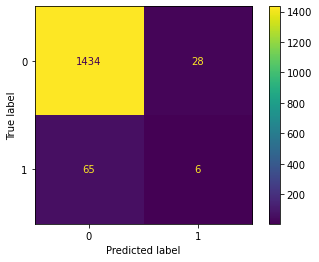

In [164]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

## Logistic regression

In [204]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [205]:
y_pred_logreg=logreg.predict(X_test)

In [206]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.9536855838225701
Precision 0.0
Recall 0.0
f1_score 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


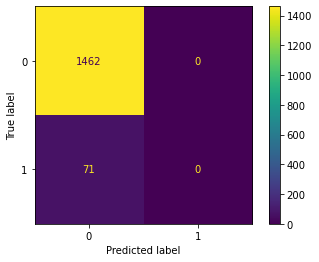

In [207]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [208]:
#metrics.roc_auc_score(y_test,y_pred)
metrics.roc_auc_score(y_test,y_pred_logreg)

0.5

## Visualizing model

In [209]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank')['stroke'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_rank_df
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,511,0.199609,102.0,102.0,0.409639,0.409639,0.1,0.1,1,4.096386
1,9,511,0.121331,62.0,164.0,0.248996,0.658635,0.1,0.2,2,3.293173
2,8,511,0.072407,37.0,201.0,0.148594,0.807229,0.1,0.3,3,2.690763
3,7,511,0.045010,23.0,224.0,0.092369,0.899598,0.1,0.4,4,2.248996
4,6,511,0.025440,13.0,237.0,0.052209,0.951807,0.1,0.5,5,1.903614
5,5,511,0.009785,5.0,242.0,0.020080,0.971888,0.1,0.6,6,1.619813
6,4,511,0.007828,4.0,246.0,0.016064,0.987952,0.1,0.7,7,1.411360
7,3,511,0.001957,1.0,247.0,0.004016,0.991968,0.1,0.8,8,1.239960
8,2,511,0.001957,1.0,248.0,0.004016,0.995984,0.1,0.9,9,1.106649
9,1,511,0.001957,1.0,249.0,0.004016,1.000000,0.1,1.0,10,1.000000


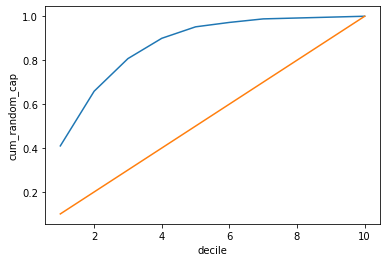

In [210]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

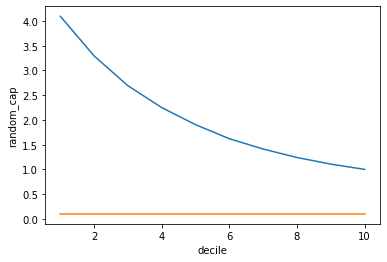

In [211]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)